# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

## load the data sets

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv('data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

D:\MyApps\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


<BarContainer object of 15 artists>

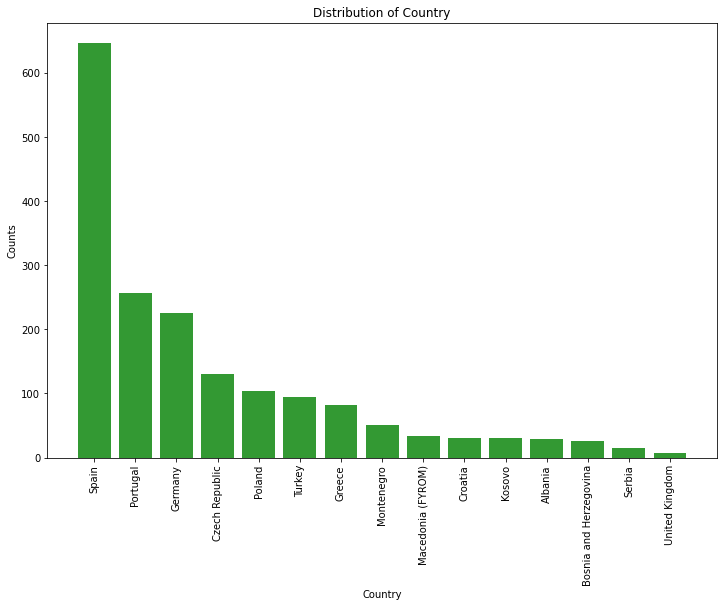

In [5]:
# Q1: Can you draw a bar chart for the country by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim

country = pd.DataFrame(df['country'].value_counts()).reset_index()
country = country.rename(columns={"index":"country", "country":"counts"})

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Distribution of Country")
ax.set_xlabel("Country")
ax.set_ylabel("Counts")
ax.set_xticklabels(country["country"], rotation=90)
ax.bar(country["country"], country["counts"], color="g", alpha=0.8)

In [6]:
import seaborn as sns
sns.set()

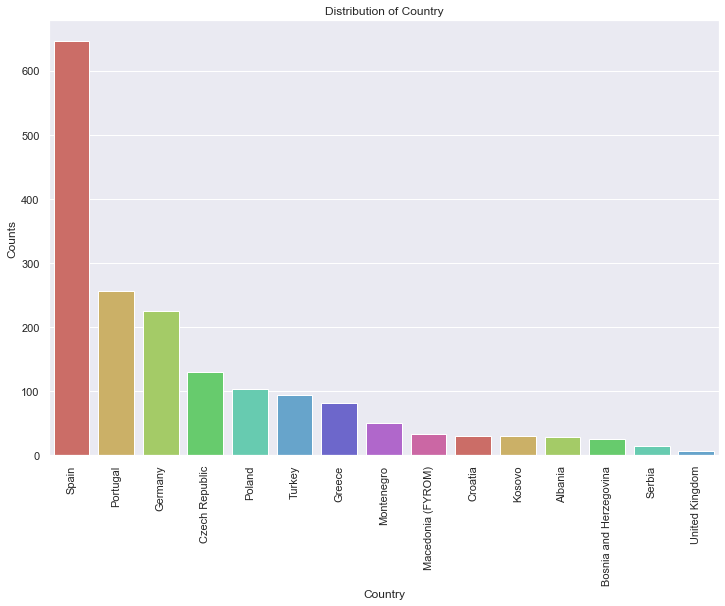

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("darkgrid")
sns.barplot(x="country", y="counts", data = country, palette=sns.color_palette("hls", 9), ax=ax)
ax.set_title("Distribution of Country")
ax.set_ylabel("Counts")
ax.set_xlabel("Country")
for i in ax.get_xticklabels():
    i.set_rotation(90)

Now you try: re-create the plot above, but make the bars orange with maroon edges.

In [8]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
city = pd.DataFrame(df['city'].value_counts()).reset_index()
city = city.rename(columns={"index":"city", "city":"counts"})
small_city = city.head(20)

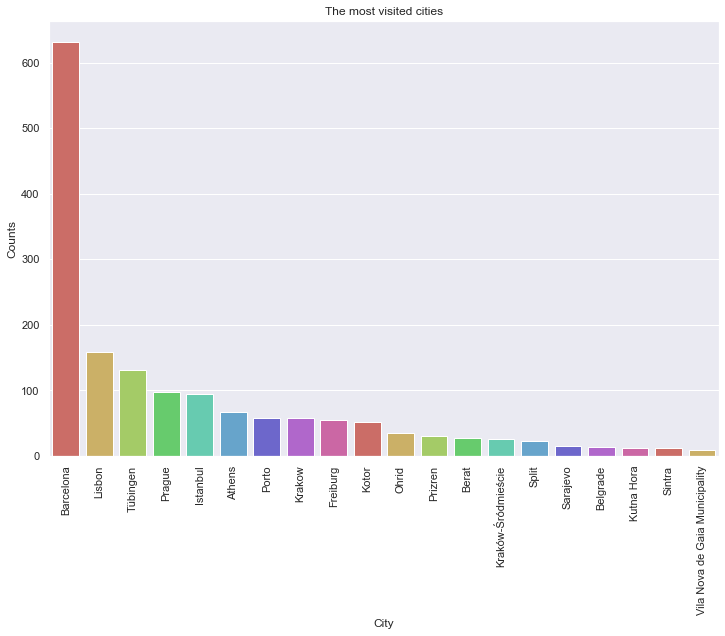

In [9]:
# the most visited cities bar chart
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("darkgrid")
sns.barplot(x="city", y="counts", data = small_city, palette=sns.color_palette("hls", 9), ax=ax)
ax.set_title("The most visited cities")
ax.set_ylabel("Counts")
ax.set_xlabel("City")
for i in ax.get_xticklabels():
    i.set_rotation(90)

## Next: scatter plots as simple maps

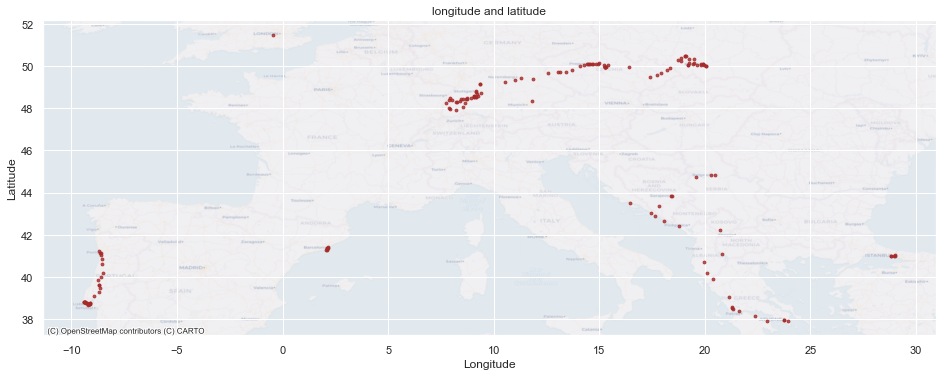

In [10]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings. 
import contextily as ctx
fig, ax = plt.subplots(figsize=(16,9))
ax.set_title("longitude and latitude")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.scatter(rs["lon"], rs["lat"], color="brown", alpha=0.8, s=8)
ctx.add_basemap(ax, crs="EPSG:4326",
    source=ctx.providers.CartoDB.Voyager, alpha = 0.4)

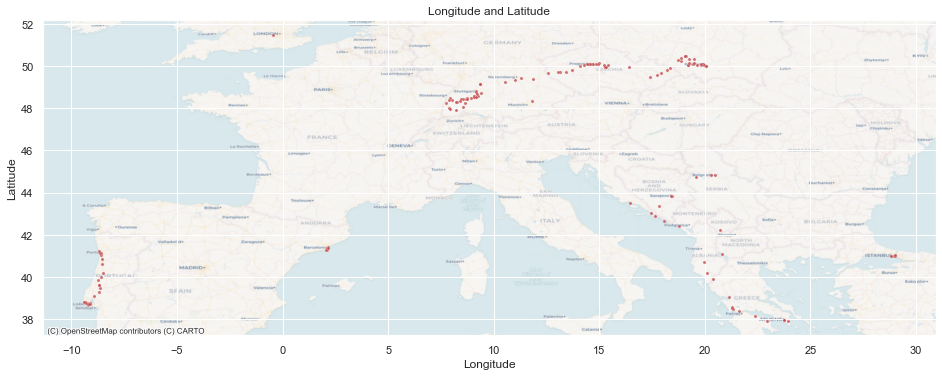

In [11]:
fig, ax = plt.subplots(figsize=(16,9))
sns.set_style("white")
sns.scatterplot(x="lon", y="lat", data = rs, ax=ax, s=10, alpha=0.8, color='r')
ax.set_title("Longitude and Latitude")
ax.set_ylabel("Latitude")
ax.set_xlabel("Longitude")
ctx.add_basemap(ax, crs="EPSG:4326",
    source=ctx.providers.CartoDB.Voyager, alpha = 0.8)

## Line charts, with annotation

In [12]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

In [13]:
countdata.tail()

2014-07-05    51
2014-07-06    40
2014-07-07    43
2014-07-08    35
2014-07-09    11
dtype: int64

In [14]:
type(countdata)

pandas.core.series.Series

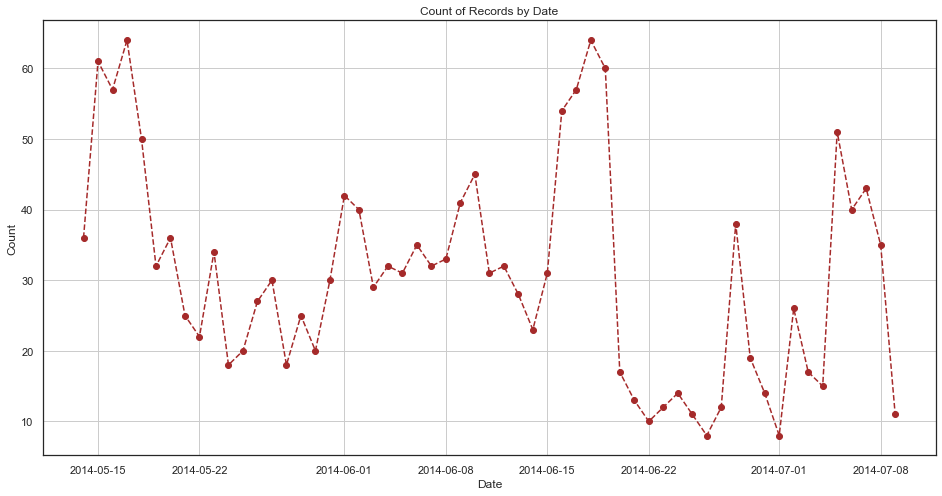

In [18]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Count of Records by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
ax.grid()
ax.plot(countdata.index, countdata, color="brown", marker = "o", linestyle="--")

<AxesSubplot:title={'center':'Count of Records by Date'}, xlabel='Date', ylabel='Count'>

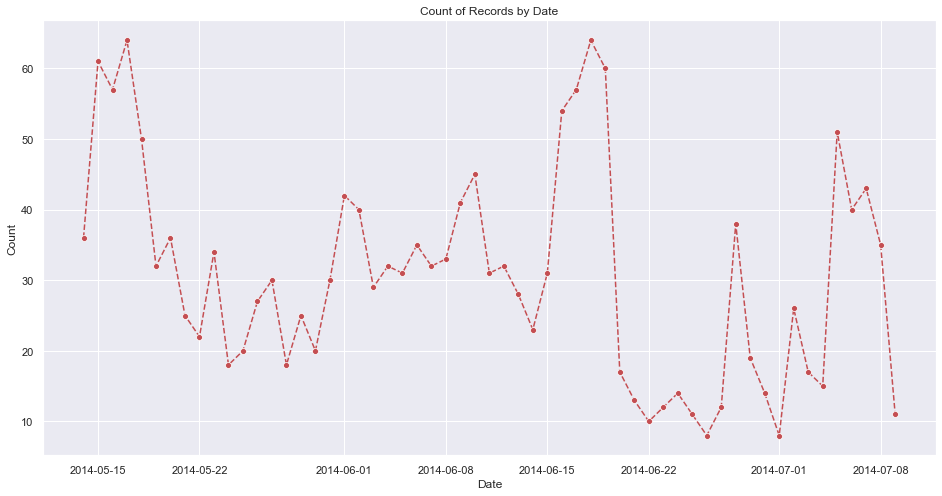

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Count of Records by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
sns.set_style("darkgrid")
sns.lineplot(x=countdata.index, y=countdata, data=countdata, ax=ax, color='r', marker = "o", linestyle="--")

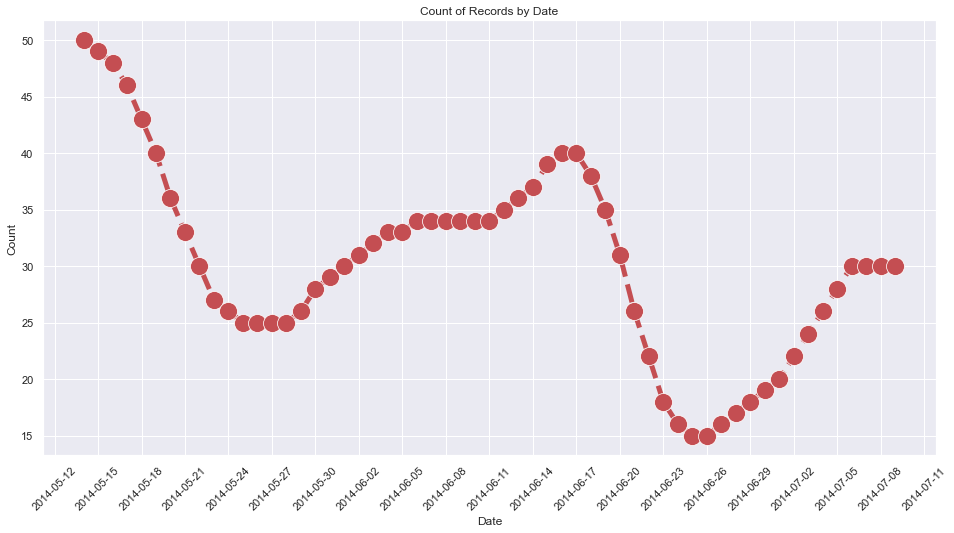

In [48]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib

import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

ysmoothed = gaussian_filter1d(countdata, sigma=3) # smooth the countdata
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title("Count of Records by Date")
ax.set_xlabel("Date")
ax.set_ylabel("Count")
sns.set_style("darkgrid")
sns.lineplot(x=countdata.index, y=ysmoothed, data=countdata, ax=ax, 
             color='r', marker = "o", markersize=18, 
             linestyle="--", linewidth=5)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3)) # set ticks interval
for i in ax.get_xticklabels():
    i.set_rotation(45)

## Pie charts

In [134]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

In [135]:
cities = cities.reset_index() 
cities = cities.rename(columns={"index":"city", "city":"count"})
cities2 = cities[:8].copy()
new_row = pd.DataFrame(data = {
    'city' : ['others'],
    'count' : [cities['count'][8:].sum()]
})
cities2 = pd.concat([cities2, new_row])
cities2

,city,count
0,Barcelona,632
1,Lisbon,158
2,Tübingen,131
3,Prague,97
4,Istanbul,94
5,Athens,67
6,Porto,58
7,Krakow,58
0,others,464


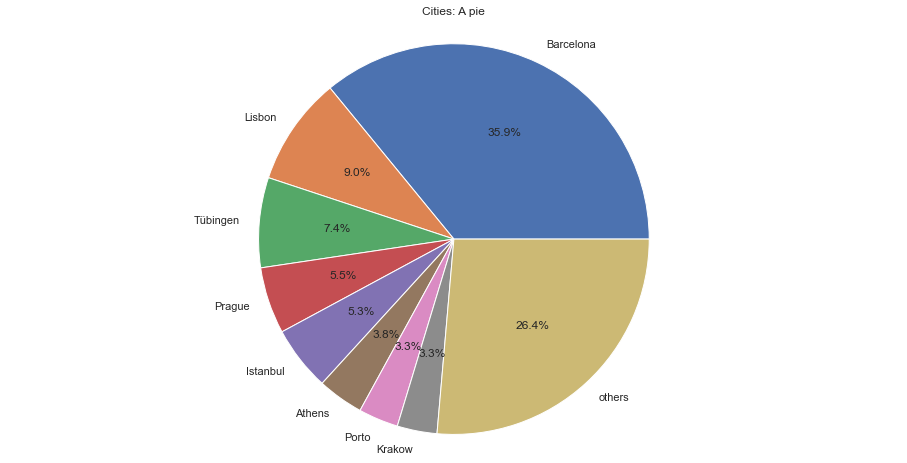

In [136]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer.
fig, ax = plt.subplots(figsize=(16,8), subplot_kw=dict(aspect="equal"))
ax.pie(cities2['count'], labels=cities2['city'], autopct='%1.1f%%')
ax.set_title("Cities: A pie")
ax.axis('equal') 
plt.show()